#Experiment 2: Overfitting Analysis and Regularization Techniques

Steps
1. Train a baseline MLP/CNN on MNIST.
2. Observe training vs validation loss.
3. Apply Dropout.
4. Apply L2 regularization.
5. Apply Batch Normalization.
6. Compare performance.

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


Load & Preprocess MNIST

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)


 Helper Function to Plot Graphs

In [16]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    # # Loss
    # plt.subplot(1,2,1)
    # plt.plot(history.history["loss"], label="Train Loss")
    # plt.plot(history.history["val_loss"], label="Val Loss")
    # plt.title(f"{title} - Loss")
    # plt.xlabel("Epochs")
    # plt.ylabel("Loss")
    # plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(history.history["accuracy"], label="Train Acc")
    plt.plot(history.history["val_accuracy"], label="Val Acc")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()


Baseline Deep Neural Network

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8882 - loss: 0.3735 - val_accuracy: 0.9725 - val_loss: 0.0876
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9751 - loss: 0.0795 - val_accuracy: 0.9773 - val_loss: 0.0771
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9841 - loss: 0.0493 - val_accuracy: 0.9807 - val_loss: 0.0708
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9884 - loss: 0.0346 - val_accuracy: 0.9793 - val_loss: 0.0748
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9904 - loss: 0.0292 - val_accuracy: 0.9783 - val_loss: 0.0799
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9925 - loss: 0.0233 - val_accuracy: 0.9845 - val_loss: 0.0704
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9932 - loss: 0.0208 - val_accuracy: 0.9805 - val_loss: 0.0902
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9941 - loss: 0.0173 - 

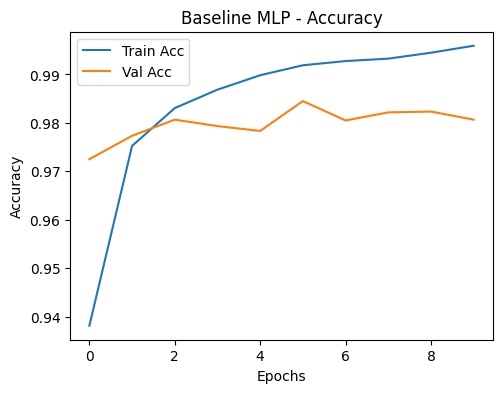

In [17]:
baseline_model = models.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

baseline_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

baseline_history = baseline_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

plot_history(baseline_history, "Baseline MLP")


Dropout Regularization

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8244 - loss: 0.5574 - val_accuracy: 0.9683 - val_loss: 0.1058
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9467 - loss: 0.1724 - val_accuracy: 0.9750 - val_loss: 0.0818
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9586 - loss: 0.1349 - val_accuracy: 0.9743 - val_loss: 0.0783
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9631 - loss: 0.1193 - val_accuracy: 0.9762 - val_loss: 0.0701
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9678 - loss: 0.1048 - val_accuracy: 0.9793 - val_loss: 0.0701
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9711 - loss: 0.0909 - val_accuracy: 0.9795 - val_loss: 0.0671
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9733 - loss: 0.0902 - val_accuracy: 0.9803 - val_loss: 0.0648
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9759 - loss: 0.0755 - 

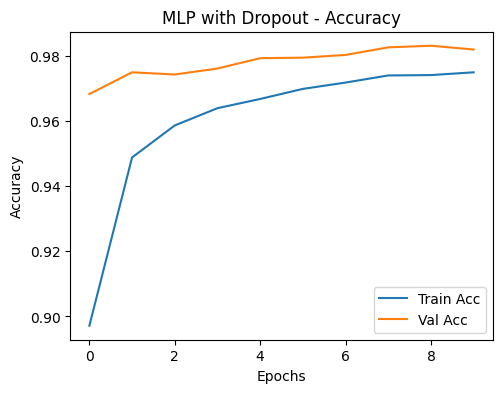

In [18]:
dropout_model = models.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

dropout_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

dropout_history = dropout_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

plot_history(dropout_history, "MLP with Dropout")


L2 Regularization

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8890 - loss: 0.4656 - val_accuracy: 0.9648 - val_loss: 0.1967
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9721 - loss: 0.1707 - val_accuracy: 0.9765 - val_loss: 0.1587
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9802 - loss: 0.1363 - val_accuracy: 0.9720 - val_loss: 0.1637
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9846 - loss: 0.1172 - val_accuracy: 0.9758 - val_loss: 0.1488
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9850 - loss: 0.1103 - val_accuracy: 0.9693 - val_loss: 0.1664
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9891 - loss: 0.0952 - val_accuracy: 0.9742 - val_loss: 0.1451
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9894 - loss: 0.0923 - val_accuracy: 0.9795 - val_loss: 0.1302
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9902 - loss: 0.0874 - 

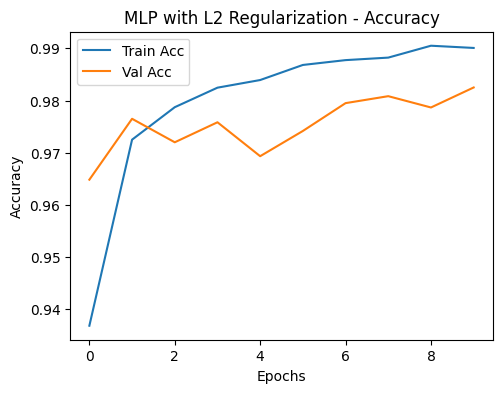

In [19]:
l2_model = models.Sequential([
    layers.Dense(512, activation="relu",
                 kernel_regularizer=regularizers.l2(1e-4),
                 input_shape=(784,)),
    layers.Dense(512, activation="relu",
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dense(10, activation="softmax")
])

l2_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

l2_history = l2_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

plot_history(l2_history, "MLP with L2 Regularization")


Batch Normalization

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9113 - loss: 0.2825 - val_accuracy: 0.9762 - val_loss: 0.0874
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9752 - loss: 0.0794 - val_accuracy: 0.9763 - val_loss: 0.0755
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9847 - loss: 0.0490 - val_accuracy: 0.9788 - val_loss: 0.0812
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9870 - loss: 0.0395 - val_accuracy: 0.9807 - val_loss: 0.0717
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9900 - loss: 0.0304 - val_accuracy: 0.9773 - val_loss: 0.0846
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9919 - loss: 0.0259 - val_accuracy: 0.9843 - val_loss: 0.0673
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9815 - val_loss: 0.0791
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9928 - loss: 0.0224 - 

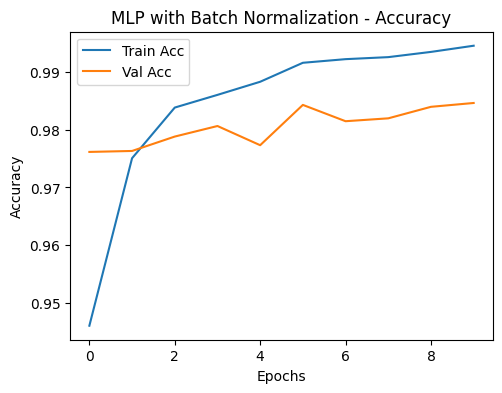

In [20]:
bn_model = models.Sequential([
    layers.Dense(512, input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dense(10, activation="softmax")
])

bn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

bn_history = bn_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

plot_history(bn_history, "MLP with Batch Normalization")


Final Test Accuracy Comparison

In [21]:
models_dict = {
    "Baseline": baseline_model,
    "Dropout": dropout_model,
    "L2": l2_model,
    "BatchNorm": bn_model
}

for name, model in models_dict.items():
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} Test Accuracy: {acc:.4f}")


Baseline Test Accuracy: 0.9819
Dropout Test Accuracy: 0.9790
L2 Test Accuracy: 0.9803
BatchNorm Test Accuracy: 0.9812


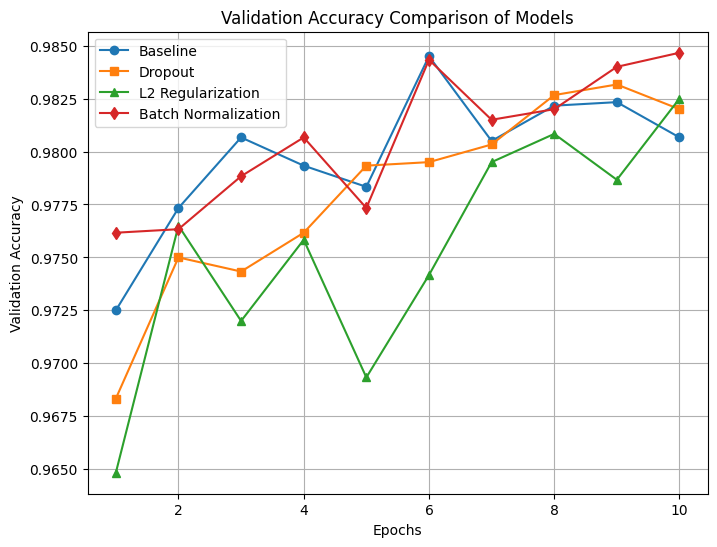

In [22]:
import matplotlib.pyplot as plt

epochs = range(1, len(baseline_history.history["val_accuracy"]) + 1)

plt.figure(figsize=(8,6))

plt.plot(epochs, baseline_history.history["val_accuracy"],
         label="Baseline", marker="o")

plt.plot(epochs, dropout_history.history["val_accuracy"],
         label="Dropout", marker="s")

plt.plot(epochs, l2_history.history["val_accuracy"],
         label="L2 Regularization", marker="^")

plt.plot(epochs, bn_history.history["val_accuracy"],
         label="Batch Normalization", marker="d")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison of Models")
plt.legend()
plt.grid(True)

plt.show()
